In [1]:
# IMPORTS

import functools
import timeit
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import time

In [2]:
# DEFINE VARIABLES

n = 11

n_values = [20, 40, 80, 160, 320, 640, 1280]

time_a = []
val_a = []
val_b = []
time_arr = []

a = []
b = []

In [3]:
# DEFINE ALGORITHMS

def func_re(n):
    if n > 1:
        return func_re(n - 3) + 4 * func_re(n // 6) + 9 * func_re(n // 7) + (n ** 3) / 2
    else:
        return 1

@functools.cache
def func_memo(n):
    if n > 1:
        return func_memo(n - 3) + 4 * func_memo(n // 6) + 9 * func_memo(n // 7) + (n ** 3) / 2
    else:
        return 1

In [4]:
def func_re(n):
    if n > 1:
        return func_re(n - 3) + 4 * func_re(n // 6) + 9 * func_re(n // 7) + (n ** 3) / 2
    else:
        return 1

def memoize(func):
    cache = dict()

    def memoized_func(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result

    return memoized_func

func_memo = memoize(func_re)

In [5]:
# Checking the correctness of the formula

for i in range(1, n):
    a.append(func_re(i))
for i in range(1, n):
    b.append(func_memo(i))

In [6]:
print("-----------------------------------------")
print(" n | F(N), Recursion | F(N), Memoization|")
for i in range(0, n - 1):
    print(str(i + 1) + " |      " + "{:.2e}".format(a[i]) + "    |     " + "{:.2e}".format(b[i]) + "     |")

print("-----------------------------------------")

-----------------------------------------
 n | F(N), Recursion | F(N), Memoization|
1 |      1.00e+00    |     1.00e+00     |
2 |      1.80e+01    |     1.80e+01     |
3 |      2.75e+01    |     2.75e+01     |
4 |      4.60e+01    |     4.60e+01     |
5 |      9.35e+01    |     9.35e+01     |
6 |      1.48e+02    |     1.48e+02     |
7 |      2.30e+02    |     2.30e+02     |
8 |      3.62e+02    |     3.62e+02     |
9 |      5.26e+02    |     5.26e+02     |
10 |      7.44e+02    |     7.44e+02     |
-----------------------------------------


In [7]:
# Recursion function time values

for i in n_values:
    start = timeit.default_timer()
    val_a.append(func_re(i))
    stop = timeit.default_timer()
    time_a.append(stop - start)

In [8]:
# Experimental evaluation of algorithm complexity

print("------------------------------------------------------------------------------------------")
print(" n   | 20        | 40        | 80       | 160       | 320       | 640      | 1280      |")
print("------------------------------------------------------------------------------------------")
print("F(n) |", end="")

for i in range(7):
    print(" {:.2e}".format(val_a[i]), end="  |")

print("\nTime |", end="")
for i in range(7):
    print(" {:.2e}".format(time_a[i]), end="  |")

print("\n-----------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------------
 n   | 20        | 40        | 80       | 160       | 320       | 640      | 1280      |
------------------------------------------------------------------------------------------
F(n) | 9.61e+03  | 1.30e+05  | 1.95e+06  | 3.11e+07  | 5.21e+08  | 9.37e+09  | 1.86e+11  |
Time | 4.00e-05  | 7.40e-05  | 2.49e-04  | 1.80e-03  | 9.80e-03  | 8.07e-02  | 6.25e-01  |
-----------------------------------------------------------------------------------------


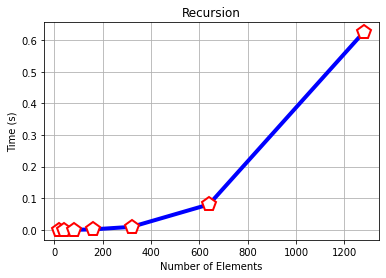

In [9]:
# Plotting recursion function time values / number of elements
fig, ax = plt.subplots()
ax.plot(n_values, time_a, '-p', color='blue',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='red',
         markeredgewidth=2)

ax.set(xlabel='Number of Elements', ylabel='Time (s)',
       title='Recursion')
ax.grid()
plt.show()

In [10]:
# Memoization function time values

n_values = [100, 200, 400, 800, 1600, 3200, 6400]

val_b = []
time_arr = []

sys.setrecursionlimit(2500)

for j in range(5):
    time_b = []

    def func_re(n):
        if n > 1:
            return func_re(n - 3) + 4 * func_re(n // 6) + 9 * func_re(n // 7) + (n ** 3) / 2
        else:
            return 1

    def memoize(func):
        cache = dict()

        def memoized_func(*args):
            if args in cache:
                return cache[args]
            result = func(*args)
            cache[args] = result
            return result

        return memoized_func

    func_memo = memoize(func_re)

    for i in n_values:
        print(i)
        start = timeit.default_timer()
        val_b.append(func_memo(i))
        stop = timeit.default_timer()
        time_b.append(stop - start)
    time_arr.append(time_b)


100
200
400
800
1600
3200
6400


In [24]:
time_arr

[[0.00011419999998452113,
  0.0006028999999898588,
  0.0037094999999567335,
  0.0287078000000065,
  0.3151442000000202,
  3.8999503000000004,
  60.75516779999998],
 [0.00011019999999462016,
  0.0005918999999607877,
  0.0036703000000102293,
  0.029142400000012003,
  0.3142958000000249,
  3.8336921000000075,
  60.32132919999998],
 [0.00011040000003958994,
  0.0006159000000138803,
  0.0037914000000114356,
  0.029838299999994433,
  0.31539169999996375,
  3.89429640000003,
  61.2732876],
 [0.00011069999999335778,
  0.0006240999999818087,
  0.0038906999999994696,
  0.030312699999967663,
  0.32460720000000265,
  4.213310499999977,
  63.26408329999998],
 [0.00011680000000069413,
  0.0006309999999984939,
  0.004082400000015696,
  0.03138509999996586,
  0.34685109999998076,
  3.9162763000000496,
  61.83969999999999]]

In [31]:
# Memoization

print("------------------------------------------------------------------------------------------")
print(" n   | 100        | 200        | 400      | 800     | 1600       | 3200     | 6400     |")
print("------------------------------------------------------------------------------------------")
print("F(n)  |", end="")

for i in range(7):
    print(" {:.2e}".format(val_b[i]), end="  |")

for j in range(5):
    print("\nTime " + str(j + 1) + "|", end="")
    for i in range(7):
        print(" {:.2e}".format(time_arr[j][i]), end="  |")

print("\n-----------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------
 n   | 100        | 200        | 400      | 800     | 1600       | 3200     | 6400     |
------------------------------------------------------------------------------------------
F(n)  | 4.73e+06  | 7.66e+07  | 1.31e+09  | 2.42e+10  | 5.03e+11  | 1.22e+13  | 3.61e+14  |
Time 1| 1.14e-04  | 6.03e-04  | 3.71e-03  | 2.87e-02  | 3.15e-01  | 3.90e+00  | 6.08e+01  |
Time 2| 1.10e-04  | 5.92e-04  | 3.67e-03  | 2.91e-02  | 3.14e-01  | 3.83e+00  | 6.03e+01  |
Time 3| 1.10e-04  | 6.16e-04  | 3.79e-03  | 2.98e-02  | 3.15e-01  | 3.89e+00  | 6.13e+01  |
Time 4| 1.11e-04  | 6.24e-04  | 3.89e-03  | 3.03e-02  | 3.25e-01  | 4.21e+00  | 6.33e+01  |
Time 5| 1.17e-04  | 6.31e-04  | 4.08e-03  | 3.14e-02  | 3.47e-01  | 3.92e+00  | 6.18e+01  |
-----------------------------------------------------------------------------------------


In [26]:
# Calculation of average value of times

avg_arr = []
for i in range(7):
    avg_arr.append((time_arr[1][i] + time_arr[2][i] +
                    time_arr[3][i] + time_arr[4][i]) / 4)

In [27]:
# Table of avg

print("Time averages (excluding first experiment)")
print("\nTime |", end="")
for i in range(7):
    print(" {:.2e}".format(avg_arr[i]), end="  |")

Time averages (excluding first experiment)

Time | 1.12e-04  | 6.16e-04  | 3.86e-03  | 3.02e-02  | 3.25e-01  | 3.96e+00  | 6.17e+01  |

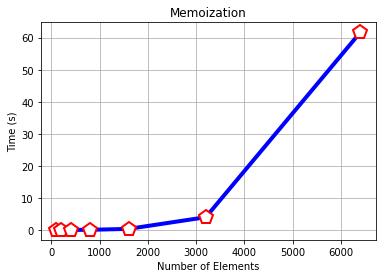

In [28]:
# Plotting avg times / number of elements

fig, ax = plt.subplots()
ax.plot(n_values, avg_arr, '-p', color='blue',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='red',
         markeredgewidth=2)

ax.set(xlabel='Number of Elements', ylabel='Time (s)',
       title='Memoization')
ax.grid()
plt.show()